In [ ]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import torch

In [37]:
input_path = Path("data/datasets/self-collected_outdoor/")

img_1 = Image.open(input_path  / "plastic" / "20251222_110106.jpg")
img_2 = Image.open(input_path  / "trash" / "20251222_110456.jpg")
img_3 = Image.open(input_path  / "paper" / "20251222_132844.jpg")
img_4 = Image.open(input_path  / "glass" / "20251222_105851.jpg")

In [49]:
# Define transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# baseline transforms
original_img = transforms.Resize((224, 224))
random_resized_crop = transforms.RandomResizedCrop(224)
random_horizontal_flip = transforms.RandomHorizontalFlip(p = 1)

# Combined baseline transform
combined_1 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p = 1),
])


# geometric augmentation
random_rotation = transforms.RandomRotation(15)
random_affine = transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.9, 1.1), shear=5)

# combined geometric augmentation
combined_2 = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.9, 1.1), shear=5)
])

# photometric augmentation
random_colorjitter = transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)
random_grayscale = transforms.RandomGrayscale(p=1)

# combined photometric augmentation
combined_3 = transforms.Compose([
    transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1),
    transforms.RandomGrayscale(p=1)
])

#mixed aug
combined_4 = transforms.Compose([        
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.9, 1.1), shear=5),
        transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
    ])

#mixed aug
combined_5 = transforms.Compose([        
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.9, 1.1), shear=5),
        transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.RandomErasing(p=1, scale=(0.05,0.2), ratio=(0.3, 3.3), value="random")
    ])


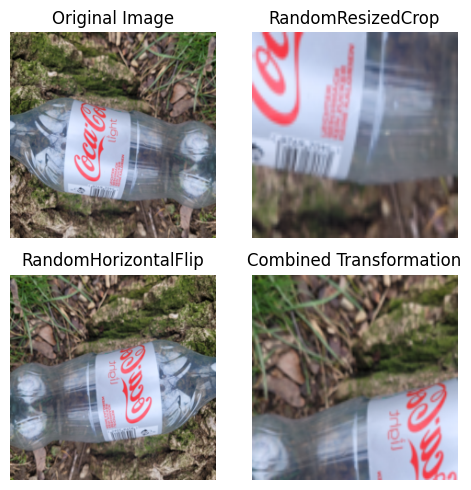

In [ ]:
original_img_1 = original_img(img_1)
randomresized_img = random_resized_crop(original_img_1)
random_horizontal_img = random_horizontal_flip(original_img_1)
combined_1_img = combined_1(original_img_1)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes[0, 0].imshow(original_img_1)
axes[0, 0].set_title('Original Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(randomresized_img)
axes[0, 1].set_title('RandomResizedCrop', fontsize=12)

axes[1, 0].imshow(random_horizontal_img)
axes[1, 0].set_title('RandomHorizontalFlip', fontsize=12)

axes[1, 1].imshow(combined_1_img)
axes[1, 1].set_title('Combined Transformation', fontsize=12)

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('images/baseline_transforms.png')


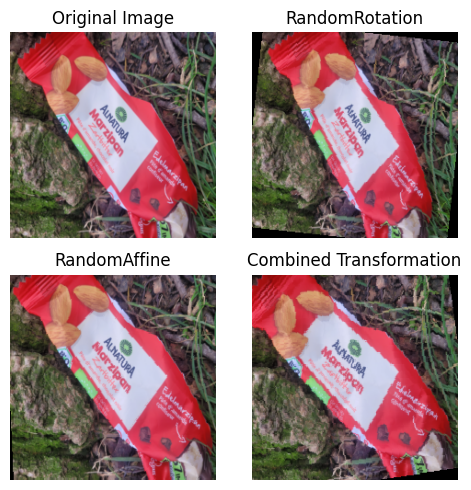

In [ ]:
original_img_2 = original_img(img_2)
random_rotation_img = random_rotation(original_img_2)
random_affine_img = random_affine(original_img_2)
combined_2_img = combined_2(original_img_2)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes[0, 0].imshow(original_img_2)
axes[0, 0].set_title('Original Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(random_rotation_img)
axes[0, 1].set_title('RandomRotation', fontsize=12)

axes[1, 0].imshow(random_affine_img)
axes[1, 0].set_title('RandomAffine', fontsize=12)

axes[1, 1].imshow(combined_2_img)
axes[1, 1].set_title('Combined Transformation', fontsize=12)

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('images/geometric_transforms.png')


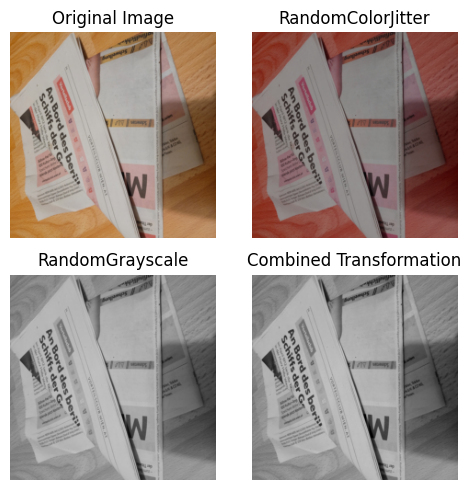

In [ ]:
original_img_3 = original_img(img_3)
random_colorjitter_img = random_colorjitter(original_img_3)
random_grayscale_img = random_grayscale(original_img_3)
combined_3_img = combined_3(original_img_3)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes[0, 0].imshow(original_img_3)
axes[0, 0].set_title('Original Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(random_colorjitter_img)
axes[0, 1].set_title('RandomColorJitter', fontsize=12)

axes[1, 0].imshow(random_grayscale_img)
axes[1, 0].set_title('RandomGrayscale', fontsize=12)

axes[1, 1].imshow(combined_3_img)
axes[1, 1].set_title('Combined Transformation', fontsize=12)

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('images/photometric_transforms.png')


In [ ]:
def show_tensor(img_tensor):
    x = img_tensor.detach().cpu().permute(1, 2, 0).numpy()
    return np.clip(x, 0, 1)


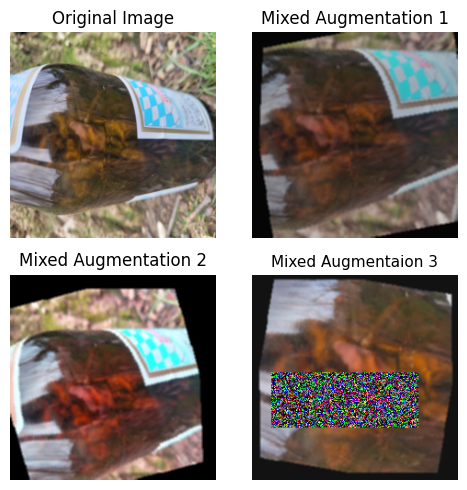

In [ ]:
original_img_4 = original_img(img_4)
combined_4_img = combined_4(img_4)
combined_5_img = combined_4(img_4)
combined_6_img = combined_5(img_4)


fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes[0, 0].imshow(original_img_4)
axes[0, 0].set_title('Original Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(combined_4_img)
axes[0, 1].set_title('Mixed Augmentation 1', fontsize=12)

axes[1, 0].imshow(combined_5_img)
axes[1, 0].set_title('Mixed Augmentation 2', fontsize=12)

axes[1, 1].imshow(show_tensor(combined_6_img))
axes[1, 1].set_title('Mixed Augmentaion 3', fontsize=11)

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('images/mixed_transforms.png')